<a href="https://colab.research.google.com/github/aag112/ML_repo/blob/master/Adv_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advertising Classification Problem

We are examining an advertising dataset with the following columns: Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country','Timestamp', 'Clicked on Ad'
-Can we use logistic regression or K-NN to determine a classification solution to different target variables. Our target variables can be Gender, Country, Clicked on Ad or Ad Topic Line. We can experiment with these different features to determine which predictions are valid.

In [1]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas_profiling.profile_report as report

#EDA

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Correlation matrix reveals that there are high positive correlations between Daily Internet Usage vs Spent on Site, Age v Clicked on Ad. Area Income vs Internet Usage/Spent on Site is somewhat positively correlated as well

In [6]:
df['Ad Topic Line'].unique()

array(['Cloned 5thgeneration orchestration',
       'Monitored national standardization',
       'Organic bottom-line service-desk',
       'Triple-buffered reciprocal time-frame',
       'Robust logistical utilization', 'Sharable client-driven software',
       'Enhanced dedicated support', 'Reactive local challenge',
       'Configurable coherent function',
       'Mandatory homogeneous architecture',
       'Centralized neutral neural-net',
       'Team-oriented grid-enabled Local Area Network',
       'Centralized content-based focus group',
       'Synergistic fresh-thinking array',
       'Grass-roots coherent extranet',
       'Persistent demand-driven interface',
       'Customizable multi-tasking website', 'Intuitive dynamic attitude',
       'Grass-roots solution-oriented conglomeration',
       'Advanced 24/7 productivity',
       'Object-based reciprocal knowledgebase',
       'Streamlined non-volatile analyzer',
       'Mandatory disintermediate utilization',
       'Futur

In [7]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
cols = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income', 'Male']
train = df[cols]

In [9]:
X = train
y = df['Clicked on Ad']

Second option to fine-tune parameters

In [32]:
cols2 = ['Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income'] #remove Male
input = df[cols2]

In [10]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(input, y, test_size=0.33, random_state=42)

In [12]:
#!pip install -U scikit-learn #there is a problem with decoding strings that can be solved by installing this library

In [34]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, max_iter=400, random_state=42).fit(X_train, y_train) #changed max-iter to solve convergence warning
predict = clf.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       162
           1       0.97      0.92      0.94       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



#Show the parameters that were used to determine our estimator

In [37]:
clf.get_params(deep=True)

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 400,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Finding the errors in our model

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[158   4]
 [ 14 154]]


In [22]:
%matplotlib inline

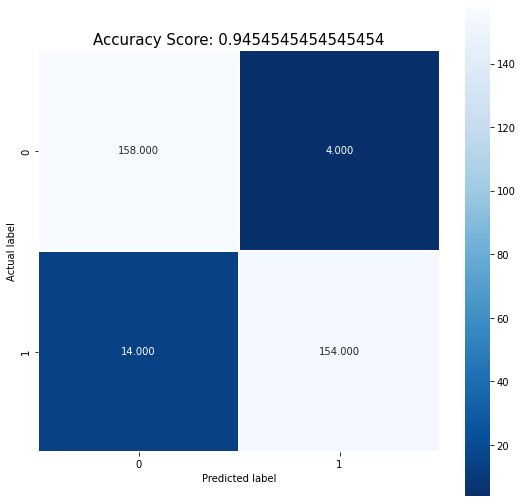

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


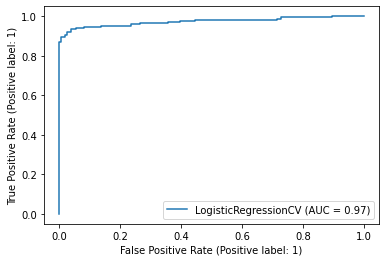

In [40]:
from sklearn import  metrics
metrics.plot_roc_curve(clf, X_test, y_test)

#One of the most important evaluation metrics for checking any classification model’s performance. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

For future reference, the function used previously is deprecated. 

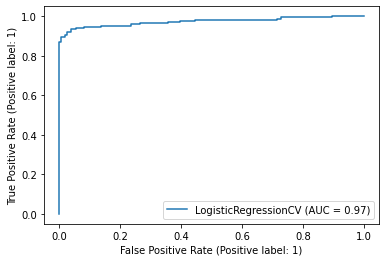

In [41]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)

for first input we achieved a 0.95 AUC with 5 false positives and 23 false negatives

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       162
           1       0.97      0.86      0.91       168

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.91       330

For our second input, we removed the Male column and we kept all other parameters the same. This improved our model to 4 false positives and 14 false negatives.

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       162
           1       0.97      0.92      0.94       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330


#KNN Classifier Model

In [42]:
from sklearn.preprocessing import StandardScaler

In [194]:
scalar = StandardScaler()

In [195]:
scalar.fit(input)

StandardScaler()

In [196]:
scaled_features = scalar.transform(input)

In [197]:
std_data = pd.DataFrame(scaled_features)
std_data.head()

,0,1,2
0,0.249267,1.734030,0.509691
1,0.961132,0.313805,1.002530
2,0.282083,1.287589,0.356949
3,0.577432,1.501580,-0.014456
4,0.212664,1.038731,1.408868


In [214]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, y, random_state=42, test_size=0.2)

In [215]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3)
(200, 3)
(800,)
(200,)


In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [217]:
knn = KNeighborsClassifier(n_neighbors=3)

In [218]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [219]:
y_pred = knn.predict(x_test)

In [220]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 84,   5],
       [  9, 102]])

In [205]:
score = knn.score(x_test,y_test)
score

0.93

In [221]:
score = []
for i in range(1,15):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.905, 0.915, 0.93, 0.925, 0.92, 0.93, 0.93, 0.935, 0.935, 0.935, 0.93, 0.93, 0.92, 0.925]


Text(0, 0.5, 'Accuracy Score')

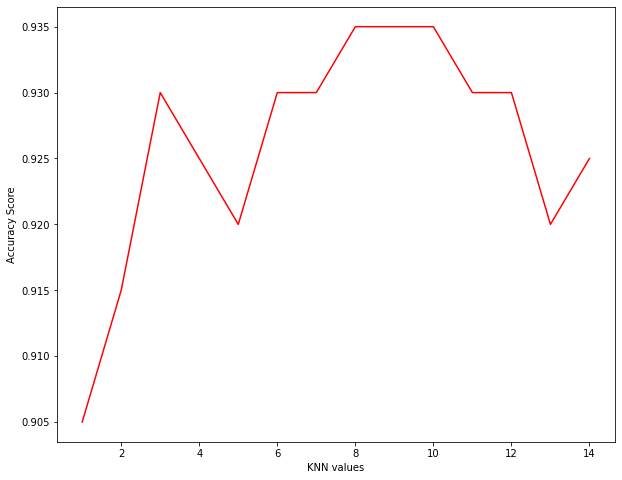

In [222]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), score, color='red')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

knn=10 is our optimal value w test size = 0.2 :
knn=3 is our optimal value w test size =0.33

In [72]:
error_rate = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

(Text(0, 0.5, 'Eror Rate'),)

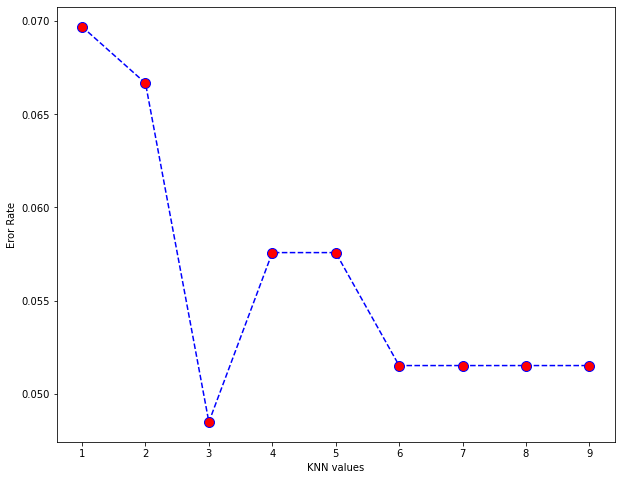

In [73]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize =10)
plt.xlabel('KNN values')
plt.ylabel('Eror Rate'), 

#The key to improve the algorithm is to add a preprocessing stage to make the final algorithm run with more efficient data and then improve the effect of classification.

We can try Robust Scaling or Min Max Scaling to improve on the outliers in the dataset. rescale the feature using the median and quartile range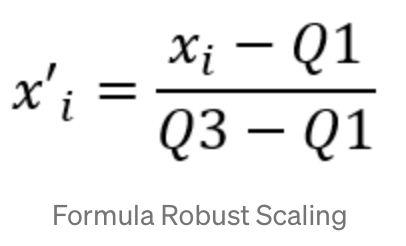

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

Try Robust Scaling

In [158]:
input2 = df[cols2]

In [159]:
scaler = RobustScaler()

In [160]:
scaler.fit(input2)

RobustScaler()

In [161]:
scaled_features2 = scaler.transform(input2)

In [162]:
std_data2 = pd.DataFrame(scaled_features2)
std_data2.head()

,0,1,2
0,0.027034,0.912428,0.261492
1,0.441931,0.133062,0.619863
2,0.046161,0.667438,0.150424
3,0.218299,0.784868,-0.119645
4,0.005701,0.530874,0.915334


In [163]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features2, y, random_state=42, test_size=0.33)

In [164]:
knn = KNeighborsClassifier(n_neighbors=1)

In [165]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [166]:
#Predict testing set
y_pred = knn.predict(X_test)

In [167]:
score = knn.score(x_test,y_test)
score

0.9303030303030303

In [98]:
from sklearn.metrics import roc_auc_score

In [168]:
roc_auc_score(y_test, y_pred)

0.9301146384479717

In [169]:
score = []
for i in range(1,10):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9303030303030303, 0.9363636363636364, 0.9515151515151515, 0.9424242424242424, 0.9454545454545454, 0.9454545454545454, 0.9454545454545454, 0.9454545454545454, 0.9484848484848485]


Text(0, 0.5, 'Accuracy Score')

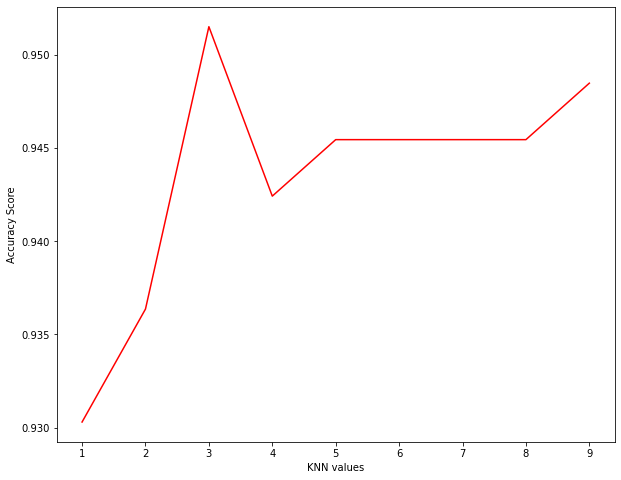

In [170]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), score, color='red')
plt.xlabel('KNN values')
plt.ylabel('Accuracy Score')

knn=3 stays optimal

Using MinMaxScaler

In [224]:
input3 = df[cols2]

In [225]:
scaler2 = MinMaxScaler()

In [226]:
scaler2.fit(input3)

MinMaxScaler()

In [227]:
scaled_features3 = scaler2.transform(input3)

In [228]:
std_data3 = pd.DataFrame(scaled_features3)
std_data3.head()

,0,1,2
0,0.617882,0.916031,0.730472
1,0.809621,0.538746,0.831375
2,0.626721,0.797433,0.699200
3,0.706272,0.854280,0.623160
4,0.608023,0.731323,0.914568


In [229]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features3, y, random_state=42, test_size=0.33)

In [230]:
knn = KNeighborsClassifier(n_neighbors=1)

In [231]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [232]:
#Predict testing set
y_pred = knn.predict(x_test)

In [233]:
score = knn.score(x_test,y_test)
score

0.9303030303030303

In [234]:
roc_auc_score(y_test, y_pred)

0.9303350970017636

#Hyperparameter Tuning

In [182]:
#List Hyperparameters
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [183]:
#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [184]:
#Making model
clf = GridSearchCV(knn, hyperparameters, cv=10)
best_model = clf.fit(X_train,y_train)

In [185]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 10


In [186]:
#Predict testing set
y_pred = best_model.predict(x_test)

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
print(accuracy_score(y_test, y_pred))

0.9484848484848485


In [193]:
#Check performance using ROC
roc_auc_score(y_test, y_pred)

0.9489638447971782

#Conclusion

It is fair to say that the features used do a decent job in predicting if a user clicked or didn't click on an ad

*   The columns used as input were ['Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income']

*   The LogisticRegressionCV outperformed KNN classifier models slightly with a top AUC score of 0.97
*   Preprocessing and using different standarization techniques can prove useful in the future for achieving better results 


*   The model was better represented when it was 0.33 of train size

* MinMaxScaler outperforms RobustScaler and StandardScaler but very slightly

